In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


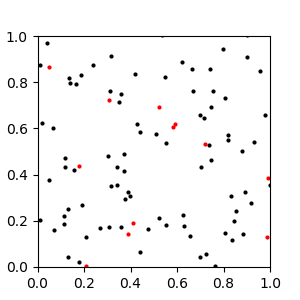

/Users/kathleencooper/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [15]:
%matplotlib notebook

n_animals = 100
n_steps = 100
#diffusion_speed = 0.05 
vmin = 0.01
vmax = 0.05
trap_size = 0.4

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size = n_animals, low = vmin, high = vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)
vy = np.random.uniform(size = n_animals, low = vmin, high = vmax)*(2*np.random.randint(size=n_animals, low=0, high=2)-1)



#Plotting   
fig = plt.figure(figsize=(3,3));
fig.show()
plt.xlim((0,1));
plt.ylim((0,1));
ax = plt.subplot(111)
fig.canvas.draw()

#Mark
color = np.where(np.logical_and(x<trap_size, y<trap_size),1,0)
n_marked = np.sum(color)
estimation = np.zeros(n_steps)


for t in range(n_steps):
    x += vx
    y += vy
    vx = np.where(np.logical_or(x>1, x<0), -vx, vx)
    vy = np.where(np.logical_or(y>1, y<0), -vy, vy)
    
    n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
    n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size))*color
    
    
    
    ax.clear()
    
    plt.plot(x,y,'.k',markersize=2);
    plt.plot(x[color==0],y[color==0],'.k',markersize=4);
    plt.plot(x[color==1],y[color==1],'r.',markersize=4);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw()
    #time.sleep(0.01)